# Imports

In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import plotly.express as px

import inflection

# Helper Variables

In [2]:
RAW_DATA_PATH = f"C:\\Users\\Breno\\Documents\\Repos\\analises_de_dados_python\\projeto_final_rev01\\data\\raw\\data.csv"

COUNTRIES = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zeland",
    162: "Philippines",
    166: "Qatar",
    184: "Singapure",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "United Arab Emirates",
    215: "England",
    216: "United States of America",
}


COLORS = {
    "3F7E00": "darkgreen",
    "5BA829": "green",
    "9ACD32": "lightgreen",
    "CDD614": "orange",
    "FFBA00": "red",
    "CBCBC8": "darkred",
    "FF7800": "darkred",
}

# Helper Functions

In [3]:
def show_dataframe_dimensions(dataframe):
    print(f"Number of Rows: {dataframe.shape[0]}")
    print(f"Number of Columns: {dataframe.shape[1]}")
    
    return None

In [4]:
def get_numerical_attributes(dataframe):
    return dataframe.select_dtypes(include=['int64', 'float64'])

In [5]:
def get_first_order_statistics(dataframe):
    # Central Tendency Metrics
    mean = pd.DataFrame(dataframe.apply(np.mean)).T
    median = pd.DataFrame(dataframe.apply(np.median)).T

    # Dispersion Metrics
    min_ = pd.DataFrame(dataframe.apply(min)).T
    max_ = pd.DataFrame(dataframe.apply(max)).T
    range_ = pd.DataFrame(dataframe.apply(lambda x: x.max() - x.min())).T
    std = pd.DataFrame(dataframe.apply(np.std)).T
    skew = pd.DataFrame(dataframe.apply(lambda x: x.skew())).T
    kurtosis = pd.DataFrame(dataframe.apply(lambda x: x.kurtosis())).T

    # Metrics Concatenation
    m = pd.concat([min_, max_, range_, mean, median, std, skew, kurtosis]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    
    return m

In [6]:
def rename_columns(dataframe):
    df = dataframe.copy()

    title = lambda x: inflection.titleize(x)

    snakecase = lambda x: inflection.underscore(x)

    spaces = lambda x: x.replace(" ", "")

    cols_old = list(df.columns)

    cols_old = list(map(title, cols_old))

    cols_old = list(map(spaces, cols_old))

    cols_new = list(map(snakecase, cols_old))

    df.columns = cols_new

    return df

In [7]:
def country_name(country_id):
    return COUNTRIES[country_id]

In [8]:
def color_name(color_code):
    return COLORS[color_code]

In [9]:
def create_price_tye(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"

In [10]:
def adjust_columns_order(dataframe):
    df = dataframe.copy()

    new_cols_order = [
        "restaurant_id",
        "restaurant_name",
        "country",
        "city",
        "address",
        "locality",
        "locality_verbose",
        "longitude",
        "latitude",
        "cuisines",
        "price_type",
        "average_cost_for_two",
        "currency",
        "has_table_booking",
        "has_online_delivery",
        "is_delivering_now",
        "aggregate_rating",
        "rating_color",
        "color_name",
        "rating_text",
        "votes",
    ]

    return df.loc[:, new_cols_order]

In [11]:
def process_data(file_path):
    df = pd.read_csv(file_path)

    df = df.dropna()

    df = rename_columns(df)

    df["price_type"] = df.loc[:, "price_range"].apply(lambda x: create_price_tye(x))

    df["country"] = df.loc[:, "country_code"].apply(lambda x: country_name(x))

    df["color_name"] = df.loc[:, "rating_color"].apply(lambda x: color_name(x))

    df["cuisines"] = df.loc[:, "cuisines"].apply(lambda x: x.split(",")[0])

    df = df.drop_duplicates()

    df = adjust_columns_order(df)

    df.to_csv("C:\\Users\\Breno\\Documents\\Repos\\analises_de_dados_python\\projeto_final_rev01\\data\\processed\\data.csv", index=False)

    return df

# Helper Configurations

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Load Data

In [13]:
df_raw = pd.read_csv(RAW_DATA_PATH)
df_raw.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,1100,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,1100,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619
2,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.024562,14.556042,"European, Asian",3100,Botswana Pula(P),0,0,0,0,4,4.7,3F7E00,Excellent,469
3,6301293,Banapple,162,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.023171,14.556196,"Filipino, American, Italian, Bakery",800,Botswana Pula(P),0,0,0,0,3,4.4,5BA829,Very Good,867
4,6315689,Bad Bird,162,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027708,14.565899,American,700,Botswana Pula(P),0,0,0,0,3,4.4,5BA829,Very Good,858


# Data Description

In [14]:
df1 = df_raw.copy()
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,1100,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,1100,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619
2,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.024562,14.556042,"European, Asian",3100,Botswana Pula(P),0,0,0,0,4,4.7,3F7E00,Excellent,469
3,6301293,Banapple,162,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.023171,14.556196,"Filipino, American, Italian, Bakery",800,Botswana Pula(P),0,0,0,0,3,4.4,5BA829,Very Good,867
4,6315689,Bad Bird,162,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027708,14.565899,American,700,Botswana Pula(P),0,0,0,0,3,4.4,5BA829,Very Good,858


# Rename Columns

In [15]:
df1 = rename_columns(df1)
df1.head()

,restaurant_id,restaurant_name,country_code,city,address,locality,locality_verbose,longitude,latitude,cuisines,average_cost_for_two,currency,has_table_booking,has_online_delivery,is_delivering_now,switch_to_order_menu,price_range,aggregate_rating,rating_color,rating_text,votes
0,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,1100,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619
1,6310675,Mama Lou's Italian Kitchen,162,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,1100,Botswana Pula(P),1,0,0,0,3,4.6,3F7E00,Excellent,619
2,6314542,Blackbird,162,Makati City,"Nielson Tower, Ayala Triangle Gardens, Salcedo...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.024562,14.556042,"European, Asian",3100,Botswana Pula(P),0,0,0,0,4,4.7,3F7E00,Excellent,469
3,6301293,Banapple,162,Makati City,"Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...","Ayala Triangle Gardens, Salcedo Village, Makat...",121.023171,14.556196,"Filipino, American, Italian, Bakery",800,Botswana Pula(P),0,0,0,0,3,4.4,5BA829,Very Good,867
4,6315689,Bad Bird,162,Makati City,"Hole In The Wall, Floor 4, Century City Mall, ...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027708,14.565899,American,700,Botswana Pula(P),0,0,0,0,3,4.4,5BA829,Very Good,858


# Data Dimensions

In [16]:
show_dataframe_dimensions(df1)

Number of Rows: 7527
Number of Columns: 21


# Data Types

In [17]:
df1.dtypes

restaurant_id             int64
restaurant_name          object
country_code              int64
city                     object
address                  object
locality                 object
locality_verbose         object
longitude               float64
latitude                float64
cuisines                 object
average_cost_for_two      int64
currency                 object
has_table_booking         int64
has_online_delivery       int64
is_delivering_now         int64
switch_to_order_menu      int64
price_range               int64
aggregate_rating        float64
rating_color             object
rating_text              object
votes                     int64
dtype: object

# Check NA

In [18]:
df1.isna().sum()

restaurant_id            0
restaurant_name          0
country_code             0
city                     0
address                  0
locality                 0
locality_verbose         0
longitude                0
latitude                 0
cuisines                15
average_cost_for_two     0
currency                 0
has_table_booking        0
has_online_delivery      0
is_delivering_now        0
switch_to_order_menu     0
price_range              0
aggregate_rating         0
rating_color             0
rating_text              0
votes                    0
dtype: int64

# Treat NA

In [19]:
df1 = df1.dropna()
df1.isna().sum()

restaurant_id           0
restaurant_name         0
country_code            0
city                    0
address                 0
locality                0
locality_verbose        0
longitude               0
latitude                0
cuisines                0
average_cost_for_two    0
currency                0
has_table_booking       0
has_online_delivery     0
is_delivering_now       0
switch_to_order_menu    0
price_range             0
aggregate_rating        0
rating_color            0
rating_text             0
votes                   0
dtype: int64

# Descriptive Statistics

In [20]:
numerical_data = get_numerical_attributes(df1)

## Numerical Data

In [21]:
get_first_order_statistics(numerical_data)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,restaurant_id,549.000000,1.904028e+07,1.903973e+07,1.054327e+07,7.701329e+06,7.075017e+06,-0.084078,-1.726900
1,country_code,1.000000,2.160000e+02,2.150000e+02,9.313472e+01,3.000000e+01,9.902019e+01,0.257296,-1.849704
2,longitude,-122.700455,1.753106e+02,2.980110e+02,3.376321e+01,7.378280e+01,7.736959e+01,-0.679659,-0.596239
3,latitude,-41.330428,5.597698e+01,9.730741e+01,1.931223e+01,2.523716e+01,2.327263e+01,-1.080186,0.608968
4,average_cost_for_two,0.000000,2.500002e+07,2.500002e+07,7.165669e+03,2.900000e+02,2.908773e+05,84.494674,7257.443719
5,has_table_booking,0.000000,1.000000e+00,1.000000e+00,6.230032e-02,0.000000e+00,2.417002e-01,3.622563,11.125924
6,has_online_delivery,0.000000,1.000000e+00,1.000000e+00,3.531683e-01,0.000000e+00,4.779544e-01,0.614540,-1.622773
7,is_delivering_now,0.000000,1.000000e+00,1.000000e+00,1.746539e-01,0.000000e+00,3.796708e-01,1.714175,0.938646
8,switch_to_order_menu,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
9,price_range,1.000000,4.000000e+00,3.000000e+00,2.625399e+00,3.000000e+00,9.595017e-01,-0.041458,-0.982738


# Business Aquestions

In [22]:
df2 = process_data(RAW_DATA_PATH)
df2.head(1)

,restaurant_id,restaurant_name,country,city,address,locality,locality_verbose,longitude,latitude,cuisines,price_type,average_cost_for_two,currency,has_table_booking,has_online_delivery,is_delivering_now,aggregate_rating,rating_color,color_name,rating_text,votes
0,6310675,Mama Lou's Italian Kitchen,Philippines,Las Piñas City,"Block 1, Lot 36, Tropical Avenue Corner Tropic...",BF International,"BF International, Las Piñas City",121.009787,14.447615,Italian,expensive,1100,Botswana Pula(P),1,0,0,4.6,3F7E00,darkgreen,Excellent,619


## Geral

### 1. Quantos restaurantes únicos estão registrados?

In [23]:
df2['restaurant_id'].nunique()

6929

### 2. Quantos paises únicos estão registrados?

In [24]:
df2.loc[:, 'country'].nunique()

15

### 3. Quantas cidades únicas estão registradas?

In [25]:
df2.loc[:, 'city'].nunique()

125

### 4. Qual o total de avaliações feitas?

In [26]:
df2.loc[:, 'votes'].sum()

4194533

### 5. Qual o total de tipos de culinária registrados?

In [27]:
df2['cuisines'].nunique()

165

## Pais

### 1. Qual o nome do país que possui mais cidades registradas? 

In [28]:
# Country e City, sera utilizado groupby e ordenação

(df2.loc[:, ['country','city']].groupby('country')
                               .nunique()
                               .sort_values('city', ascending = False)
                               .reset_index()
                               .iloc[0,0])

'India'

### 2. Qual o nome do país que possui mais restaurantes registrados?

In [29]:
# Qual ['country','restaurant_id'], utilizando nunique para saber a quantidade de restaurantes unicos

(df2.loc[:, ['country','restaurant_id']].groupby('country')
                                        .nunique()
                                        .sort_values('restaurant_id', ascending = False)
                                        .reset_index()
                                        .iloc[0,0])

'India'

### 3. Qual o nome do país que possui mais restaurantes com os nível de preço igual a 4 registrados?

In [30]:
# ['country','restaurant_id'] 

(df2.loc[df2['aggregate_rating'] == 4, ['country','restaurant_id']].groupby('country')
                                                                   .count()
                                                                   .sort_values('restaurant_id', ascending = False)
                                                                   .reset_index()
                                                                   .iloc[0,0])

'India'

### 4. Qual o nome da país que possui a maior quantidade de tipos de culinária distintos?

In [31]:
# ['country','cuisines'] nunique

(df2.loc[:, ['country','cuisines']].groupby('country')
                                   .nunique()
                                   .sort_values('cuisines', ascending = False)
                                   .reset_index()
                                   .iloc[0,0])

'India'

### 5. Qual o nome do país que possui a maior quantidade de avaliações feitas?

In [32]:
# Fazer um groupby de 'country' agrupando ['country','votes'] utilizando somatoria

(df2.loc[:, ['country','votes']].groupby('country')
                                   .count()
                                   .sort_values('votes', ascending = False)
                                   .reset_index()
                                   .iloc[0,0])

'India'

### 6. Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?

In [33]:
# Fazer um groupby com 'country' agrupando ['country', 'is_delivering_now'] utilizando count()

(df2.loc[:, ['country', 'is_delivering_now']].groupby('country')
                                   .count()
                                   .sort_values('is_delivering_now', ascending = False)
                                   .reset_index()
                                   .iloc[0,0])

'India'

### 7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?

In [34]:
# Fazer um groupby com 'country' agrupando ['country', 'has_table_booking'] utilizando count()

(df2.loc[df2['has_table_booking'] == 1, ['country', 'has_table_booking']].groupby('country')
                                                                          .count()
                                                                          .sort_values('has_table_booking', ascending = False)
                                                                          .reset_index()
                                                                          .iloc[0,0])

'India'

### 8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registrada?

In [35]:
# Fazer um groupby com 'country agrupando ['country', 'votes'] utilizando mean()
(df2.loc[:, ['country', 'votes']].groupby('country')
                                 .mean()
                                 .sort_values('votes', ascending = False)
                                 .reset_index()
                                 .iloc[0,0])

'Indonesia'

### 9. Qual o nome do país que possui, na média, a maior nota média registrada?

In [36]:
# Fazer um groupby com 'country agrupando ['country', 'aggregate_rating'] utilizando mean()
(df2.loc[:, ['country', 'aggregate_rating']].groupby('country')
                                 .mean()
                                 .sort_values('aggregate_rating', ascending = False)
                                 .reset_index()
                                 .iloc[0,0])

'Indonesia'

### 10. Qual o nome do país que possui, na média, a menor nota média registrada?

In [37]:
# Fazer um groupby com 'country agrupando ['country', 'aggregate_rating'] utilizando mean(), porem com sort_value = True
(df2.loc[:, ['country', 'aggregate_rating']].groupby('country')
                                 .mean()
                                 .sort_values('aggregate_rating', ascending = True)
                                 .reset_index()
                                 .iloc[0,0])

'Brazil'

### 11. Qual a média de preço de um prato para dois por país?

In [38]:
# Fazer um groupby com 'country' agrupando ['country', 'average_cost_for_two'] utilizando mean()

(df2.loc[:, ['country', 'average_cost_for_two']].groupby('country')
                                 .mean()
                                 .sort_values('average_cost_for_two', ascending = False)
                                 .reset_index()
                                 .iloc[0,0])

'Indonesia'

## Cidades

### 1. Qual o nome da cidade que possui mais restaurantes registrados?

In [39]:
# Fazer um groupby com 'city' agrupando ['city', 'restaurant_id'] utilizando count()

(df2.loc[:, ['city', 'restaurant_id']].groupby('city')
                                      .count()
                                      .sort_values('restaurant_id', ascending = False)
                                      .reset_index()
                                      .iloc[0,0])

'Abu Dhabi'

### 2. Qual o nome da cidade que possui mais restaurantes com nota média acima de 4?

In [40]:
# Fazer um groupby com 'city' agrupando ['city', 'aggregate_rating'] utilizando count
# utilizar filtro df2['aggreagate_rating'] >=4
(df2.loc[df2['aggregate_rating'] >= 4, ['city', 'aggregate_rating']].groupby('city')
                                                                    .count()
                                                                    .sort_values('aggregate_rating', ascending = False)
                                                                    .reset_index()
                                                                    .iloc[0,0])


'London'

### 3. Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

In [41]:
# Fazer um groupby com 'city' agrupando ['city', 'aggregate_rating'] utilizando count
# utilizar filtro df2['aggreagate_rating'] <=2.5

(df2.loc[df2['aggregate_rating'] <= 2.5, ['city', 'aggregate_rating']].groupby('city')
                                                                      .count()
                                                                      .sort_values('aggregate_rating', ascending = False)
                                                                      .reset_index()
                                                                      .iloc[0,0])

'Gangtok'

### 4. Qual o nome da cidade que possui o maior valor médio de um prato para dois?

In [42]:
# Fazer um groupby com 'city' agrupando ['city', 'average_cost_for_two'] utilizando mean()

(df2.loc[:, ['city', 'average_cost_for_two']].groupby('city')
                                             .mean()
                                             .sort_values('average_cost_for_two', ascending = False)
                                             .reset_index()
                                             .iloc[0,0])

'Adelaide'

### 5. Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintas?

In [43]:
# Fazer um groupby com 'city' agrupando ['city', 'cuisines'] utilizando nunique() por ser culinária distinta

(df2.loc[:, ['city', 'cuisines']].groupby('city')
                                 .nunique()
                                 .sort_values('cuisines', ascending = False)
                                 .reset_index().iloc[0,0])

'Birmingham'

### 6. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem reservas?

In [44]:
# Fazer um groupby('city') agrupando ['city', 'restaurant_id'] utilizando filtro ['has_table_booking'] == 1

(df2.loc[df2['has_table_booking'] == 1, ['city', 'restaurant_id']].groupby('city')
                                                                      .count()
                                                                      .sort_values('restaurant_id', ascending=False)
                                                                      .reset_index()
                                                                      .iloc[0,0])
                                                                     

'Bangalore'

### 7. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

In [45]:
# groupby('city')
# Quantidade de restaurantes => 'restaurant_id'
# Filtrar por 'is_delivering_now'

(df2.loc[df2['is_delivering_now'] == 1,['city', 'restaurant_id']].groupby('city')
                                                                 .count()
                                                                 .sort_values('restaurant_id', ascending = False)
                                                                 .reset_index()
                                                                 .iloc[0,0])

'Vadodara'

### 8. Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

In [46]:
# groupby('city')
#  ['city', 'restaurant_id']
# Filtrar por ['has_online_delivery'] == 1

(df2.loc[df2['has_online_delivery'] == 1, ['city', 'restaurant_id']].groupby('city')
                                                                    .count()
                                                                    .sort_values('restaurant_id', ascending = False)
                                                                    .reset_index()
                                                                    .iloc[0,0])

'Bhopal'

## Restaurantes

### 1. Qual o nome do restaurante que possui a maior quantidade de avaliações?

In [47]:
# sort_values = ['votes', 'restaurant_id']
cols = ['restaurant_id', 'restaurant_name', 'country','city', 'cuisines', 'aggregate_rating', 'votes']

df2.loc[:, cols].sort_values(['votes', 'restaurant_id'], ascending = [False, True]).iloc[0,1]

'Bawarchi'

### 2. Qual o nome do restaurante com a maior nota média?

In [48]:
cols = ['restaurant_id', 'restaurant_name', 'country','city', 'cuisines', 'aggregate_rating', 'votes']

df2.loc[:, cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [False, True]).iloc[0,1]

'Indian Grill Room'

### 3. Qual o nome do restaurante que possui o maior valor de uma prato para duas pessoas?

In [49]:
cols = ['restaurant_id', 'restaurant_name', 'country','city', 'cuisines','average_cost_for_two', 'aggregate_rating', 'votes']

df2.loc[:, cols].sort_values(['average_cost_for_two', 'restaurant_id'], ascending = [False, True]).iloc[0,1]

"d'Arry's Verandah Restaurant"

### 4. Qual o nome do restaurante de tipo de culinária brasileira que possui a menor média de avaliação?

In [50]:
cols = ['restaurant_id', 'restaurant_name', 'country','city', 'cuisines','average_cost_for_two', 'aggregate_rating', 'votes']

df2.loc[df2['cuisines'] == 'Brazilian', cols].sort_values(['average_cost_for_two', 'restaurant_id'], ascending = [False, True]).iloc[0,1]

'Texas De Brazil'

### 5. Qual o nome do restaurante de tipo de culinária brasileira, e que é do Brasil, que possui a maior média de avaliação?

In [51]:
cols = ['restaurant_id', 'restaurant_name', 'country','city', 'cuisines','average_cost_for_two', 'aggregate_rating', 'votes']
lines = (df2['country'] == 'Brazil') & (df2['cuisines'] == 'Brazilian')

df2.loc[lines, cols].sort_values(['average_cost_for_two', 'restaurant_id'], ascending = [False, True]).iloc[0,1]

'Oro'

### 6. Os restaurantes que aceitam pedido online são também, na média, os restaurantes que mais possuem avaliações registradas?

In [52]:
# restaurant_id , 'has_online_delivery', 'votes'

(df2.loc[:, ['has_online_delivery', 'votes']].groupby('has_online_delivery')
                                            .mean()
                                            .sort_values('votes', ascending = False)
                                            .reset_index())

,has_online_delivery,votes
0,1,838.821664
1,0,479.421018


### 7. Os restaurantes que fazem reservas são também, na média, os restaurantes que possuem o maior valor médio de um prato para duas pessoas?

In [53]:
# ['has_table_booking','average_cost_for_two']
# mean()
# groupby('has_tables_booking')

(df2.loc[:, ['has_table_booking','average_cost_for_two']].groupby('has_table_booking')
                                                          .mean()
                                                          .sort_values('average_cost_for_two', ascending = False)
                                                          .reset_index())

,has_table_booking,average_cost_for_two
0,1,69998.423810
1,0,3488.596866


### 8. Os restaurantes do tipo de culinária japonesa dos Estados Unidos da América possuem um valor médio de prato para duas pessoas maior que as churrascarias americanas (BBQ)?

In [54]:
# Fazer um groupby('cuisines') agrupando ['average_cost_for_two', 'cuisines']
# Filtrar df2['cuisines'] == 'Japanese'
# Filtrar (df2['coumtry'] = 'United States of America') & (df2['cuisines'] == 'BBQ') | 

lines = (df2['country'] == 'United States of America') & ((df2['cuisines'] == 'BBQ') | (df2['cuisines'] == 'Japanese'))
(df2.loc[lines, ['cuisines','average_cost_for_two']].groupby('cuisines')
                                                          .mean()
                                                          .sort_values('average_cost_for_two', ascending = False)
                                                          .reset_index())


,cuisines,average_cost_for_two
0,Japanese,56.406250
1,BBQ,39.642857


## Tipo de Colunária

### 1. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a maior média de avaliação?

In [55]:
# df2['cuisines'] == 'Italian'
# ['cuisines', 'aggregate_rating']

cols = [
    'restaurant_id', 'restaurant_name', 'country', 
    'city', 'cuisines', 'average_cost_for_two', 
    'aggregate_rating', 'votes'
]

(df2.loc[df2['cuisines'] == 'Italian', cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [False, True]).iloc[0,1])

'Darshan'

### 2. Dos restaurantes que possuem o tipo de culinária italiana, qual o nome do restaurante com a menor média de avaliação?

In [56]:
cols = [
    'restaurant_id', 'restaurant_name', 'country', 
    'city', 'cuisines', 'average_cost_for_two', 
    'aggregate_rating', 'votes'
]

(df2.loc[df2['cuisines'] == 'Italian', cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [True, True]).iloc[0,1])

'Avenida Paulista'

### 3. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a maior média de avaliação?


In [57]:
cols = [
    'restaurant_id', 'restaurant_name', 'country', 
    'city', 'cuisines', 'average_cost_for_two', 
    'aggregate_rating', 'votes'
]

(df2.loc[df2['cuisines'] == 'American', cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [False, True]).iloc[0,1])

'Burger & Lobster'

### 4. Dos restaurantes que possuem o tipo de culinária americana, qual o nome do restaurante com a menor média de avaliação?

In [58]:
cols = [
    'restaurant_id', 'restaurant_name', 'country', 
    'city', 'cuisines', 'average_cost_for_two', 
    'aggregate_rating', 'votes'
]

(df2.loc[df2['cuisines'] == 'American', cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [True, True]).iloc[0,1])

'Alston Bar & Beef'

### 5. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a maior média de avaliação?

In [59]:
cols = [
    'restaurant_id', 'restaurant_name', 'country', 
    'city', 'cuisines', 'average_cost_for_two', 
    'aggregate_rating', 'votes'
]

(df2.loc[df2['cuisines'] == 'Arabian', cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [False, True]).iloc[0,1])

'Mandi@36'

### 6. Dos restaurantes que possuem o tipo de culinária árabe, qual o nome do restaurante com a menor média de avaliação?

In [60]:
cols = [
    'restaurant_id', 'restaurant_name', 'country', 
    'city', 'cuisines', 'average_cost_for_two', 
    'aggregate_rating', 'votes'
]

(df2.loc[df2['cuisines'] == 'Arabian', cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [True, True]).iloc[0,1])

'Raful'

### 7. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a maior média de avaliação?

In [61]:
cols = [
    'restaurant_id', 'restaurant_name', 'country', 
    'city', 'cuisines', 'average_cost_for_two', 
    'aggregate_rating', 'votes'
]

(df2.loc[df2['cuisines'] == 'Japanese', cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [False, True]).iloc[0,1])

'Sushi Samba'

### 8. Dos restaurantes que possuem o tipo de culinária japonesa, qual o nome do restaurante com a menor média de avaliação?

In [62]:
cols = [
    'restaurant_id', 'restaurant_name', 'country', 
    'city', 'cuisines', 'average_cost_for_two', 
    'aggregate_rating', 'votes'
]

(df2.loc[df2['cuisines'] == 'Japanese', cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [True, True]).iloc[0,1])

'Banzai Sushi'

### 9. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a maior média de avaliação?

In [63]:
cols = [
    'restaurant_id', 'restaurant_name', 'country', 
    'city', 'cuisines', 'average_cost_for_two', 
    'aggregate_rating', 'votes'
]

(df2.loc[df2['cuisines'] == 'Home-made', cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [False, True]).iloc[0,1])

'Kanaat Lokantası'

### 10. Dos restaurantes que possuem o tipo de culinária caseira, qual o nome do restaurante com a menor média de avaliação?

In [64]:
cols = [
    'restaurant_id', 'restaurant_name', 'country', 
    'city', 'cuisines', 'average_cost_for_two', 
    'aggregate_rating', 'votes'
]

(df2.loc[df2['cuisines'] == 'Home-made', cols].sort_values(['aggregate_rating', 'restaurant_id'], ascending = [True, True]).iloc[0,1])

'GurMekan Restaurant'

### 11. Qual o tipo de culinária que possui o maior valor médio de um prato para duas pessoas?

In [65]:
# ['cuisines', 'average_cost_for_two']
#groupby('cuisine')

(df2.loc[:,['cuisines', 'average_cost_for_two']].groupby('cuisines')
                                                .max()
                                                .sort_values('average_cost_for_two', ascending = False)
                                                .reset_index()
                                                .head(1))

,cuisines,average_cost_for_two
0,Modern Australian,25000017


### 12. Qual o tipo de culinária que possui a maior nota média?

In [66]:
(df2.loc[:,['cuisines', 'aggregate_rating']].groupby('cuisines')
                                           .max()
                                           .sort_values('aggregate_rating', ascending = False)
                                           .reset_index()
                                           .head(1))

,cuisines,aggregate_rating
0,Indian,4.9


### 13. Qual o tipo de culinária que possui mais restaurantes que aceitam pedidos online e fazem entregas?

In [68]:
lines = (df2['has_online_delivery'] == 1) & (df2['is_delivering_now'] == 1)

(df2.loc[lines, ['cuisines','restaurant_id']].groupby('cuisines')
                                             .count()
                                             .sort_values('restaurant_id', ascending = False)
                                             .reset_index()
                                             .head(1))

,cuisines,restaurant_id
0,North Indian,317


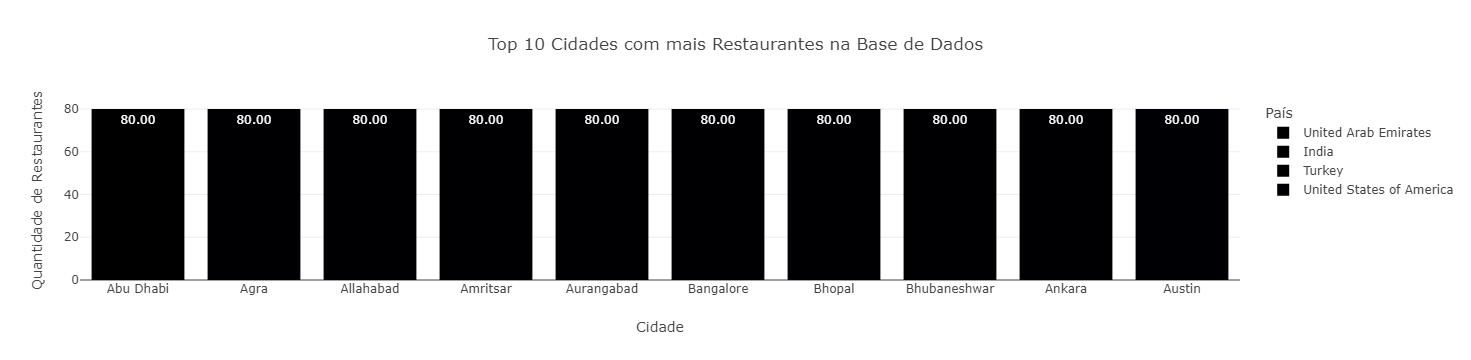

In [76]:
grouped_df = (df2.loc[:, ["restaurant_id", "country", "city"]].groupby(["country", "city"])
                                                              .count()                                              
                                                              .sort_values(["restaurant_id", "city"], ascending=[False, True])
                                                              .reset_index())

fig = px.bar(
        grouped_df.head(10),
        x="city",
        y="restaurant_id",
        text="restaurant_id",
        text_auto=".2f",
        color="country",
        title="Top 10 Cidades com mais Restaurantes na Base de Dados",
        labels={
            "city": "Cidade",
            "restaurant_id": "Quantidade de Restaurantes",
            "country": "País",
        },
    )

fig.show()